In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import get_hex
from highlight_text import fig_text, ax_text
from matplotlib.font_manager import FontProperties

df = pd.read_csv('../../natural-disaster/disaster-events.csv')

def remove_agg_rows(entity: str):
   if entity.lower().startswith('all disasters'):
      return False
   else:
      return True
df = df.replace('Dry mass movement', 'Drought')
df = df[df['Entity'].apply(remove_agg_rows)]
df = df[~df['Entity'].isin(['Fog', 'Glacial lake outburst flood'])]
df = df.pivot_table(index='Entity', columns='Year', values='Disasters').T
df.loc[1900, :] = df.loc[1900, :].fillna(0)
df = df[df.index >= 1960]
df = df[df.index <= 2023]
df = df.interpolate(axis=1)
df.head()

Entity  Drought  Earthquake  Extreme temperature  Extreme weather  Flood  \
Year                                                                       
1960        1.0         8.0                 14.0             20.0    8.0   
1961        1.0         3.0                  1.0             14.0    9.0   
1962        1.0         4.0                  1.0             13.0    8.0   
1963        1.0         3.0                  2.0             21.0    8.0   
1964        8.0         7.0                 14.5             22.0   22.0   

Entity  Volcanic activity  Wet mass movement  Wildfire  
Year                                                    
1960                  1.0                2.0       2.0  
1961                  5.5                2.0       2.0  
1962                  5.0                2.0       2.0  
1963                  3.0                2.0       2.0  
1964                  1.0                1.0       1.0

In [2]:
def arrow_inflexion(
   ax,
   start, end,
   angleA, angleB,
   radius=0,
   color="black",
   transform=None
):
   
   # get the coordinates
   x1, y1 = end
   x2, y2 = start
   
   # avoid division by zero
   epsilon = 1e-6
   if x2 == x1:
      x2 += epsilon
   if y2 == y1:
      y2 += epsilon
   
   # select right coordinates
   if transform is None:
      transform = ax.transData
   
   # add the arrow
   connectionstyle = f"angle,angleA={angleA},angleB={angleB},rad={radius}"
   ax.annotate(
      "",
      xy=(x1, y1), xycoords=transform,
      xytext=(x2, y2), textcoords=transform,
      arrowprops=dict(
         color=color, arrowstyle="->",
         shrinkA=5, shrinkB=5,
         patchA=None, patchB=None,
         connectionstyle=connectionstyle,
      ),
   )

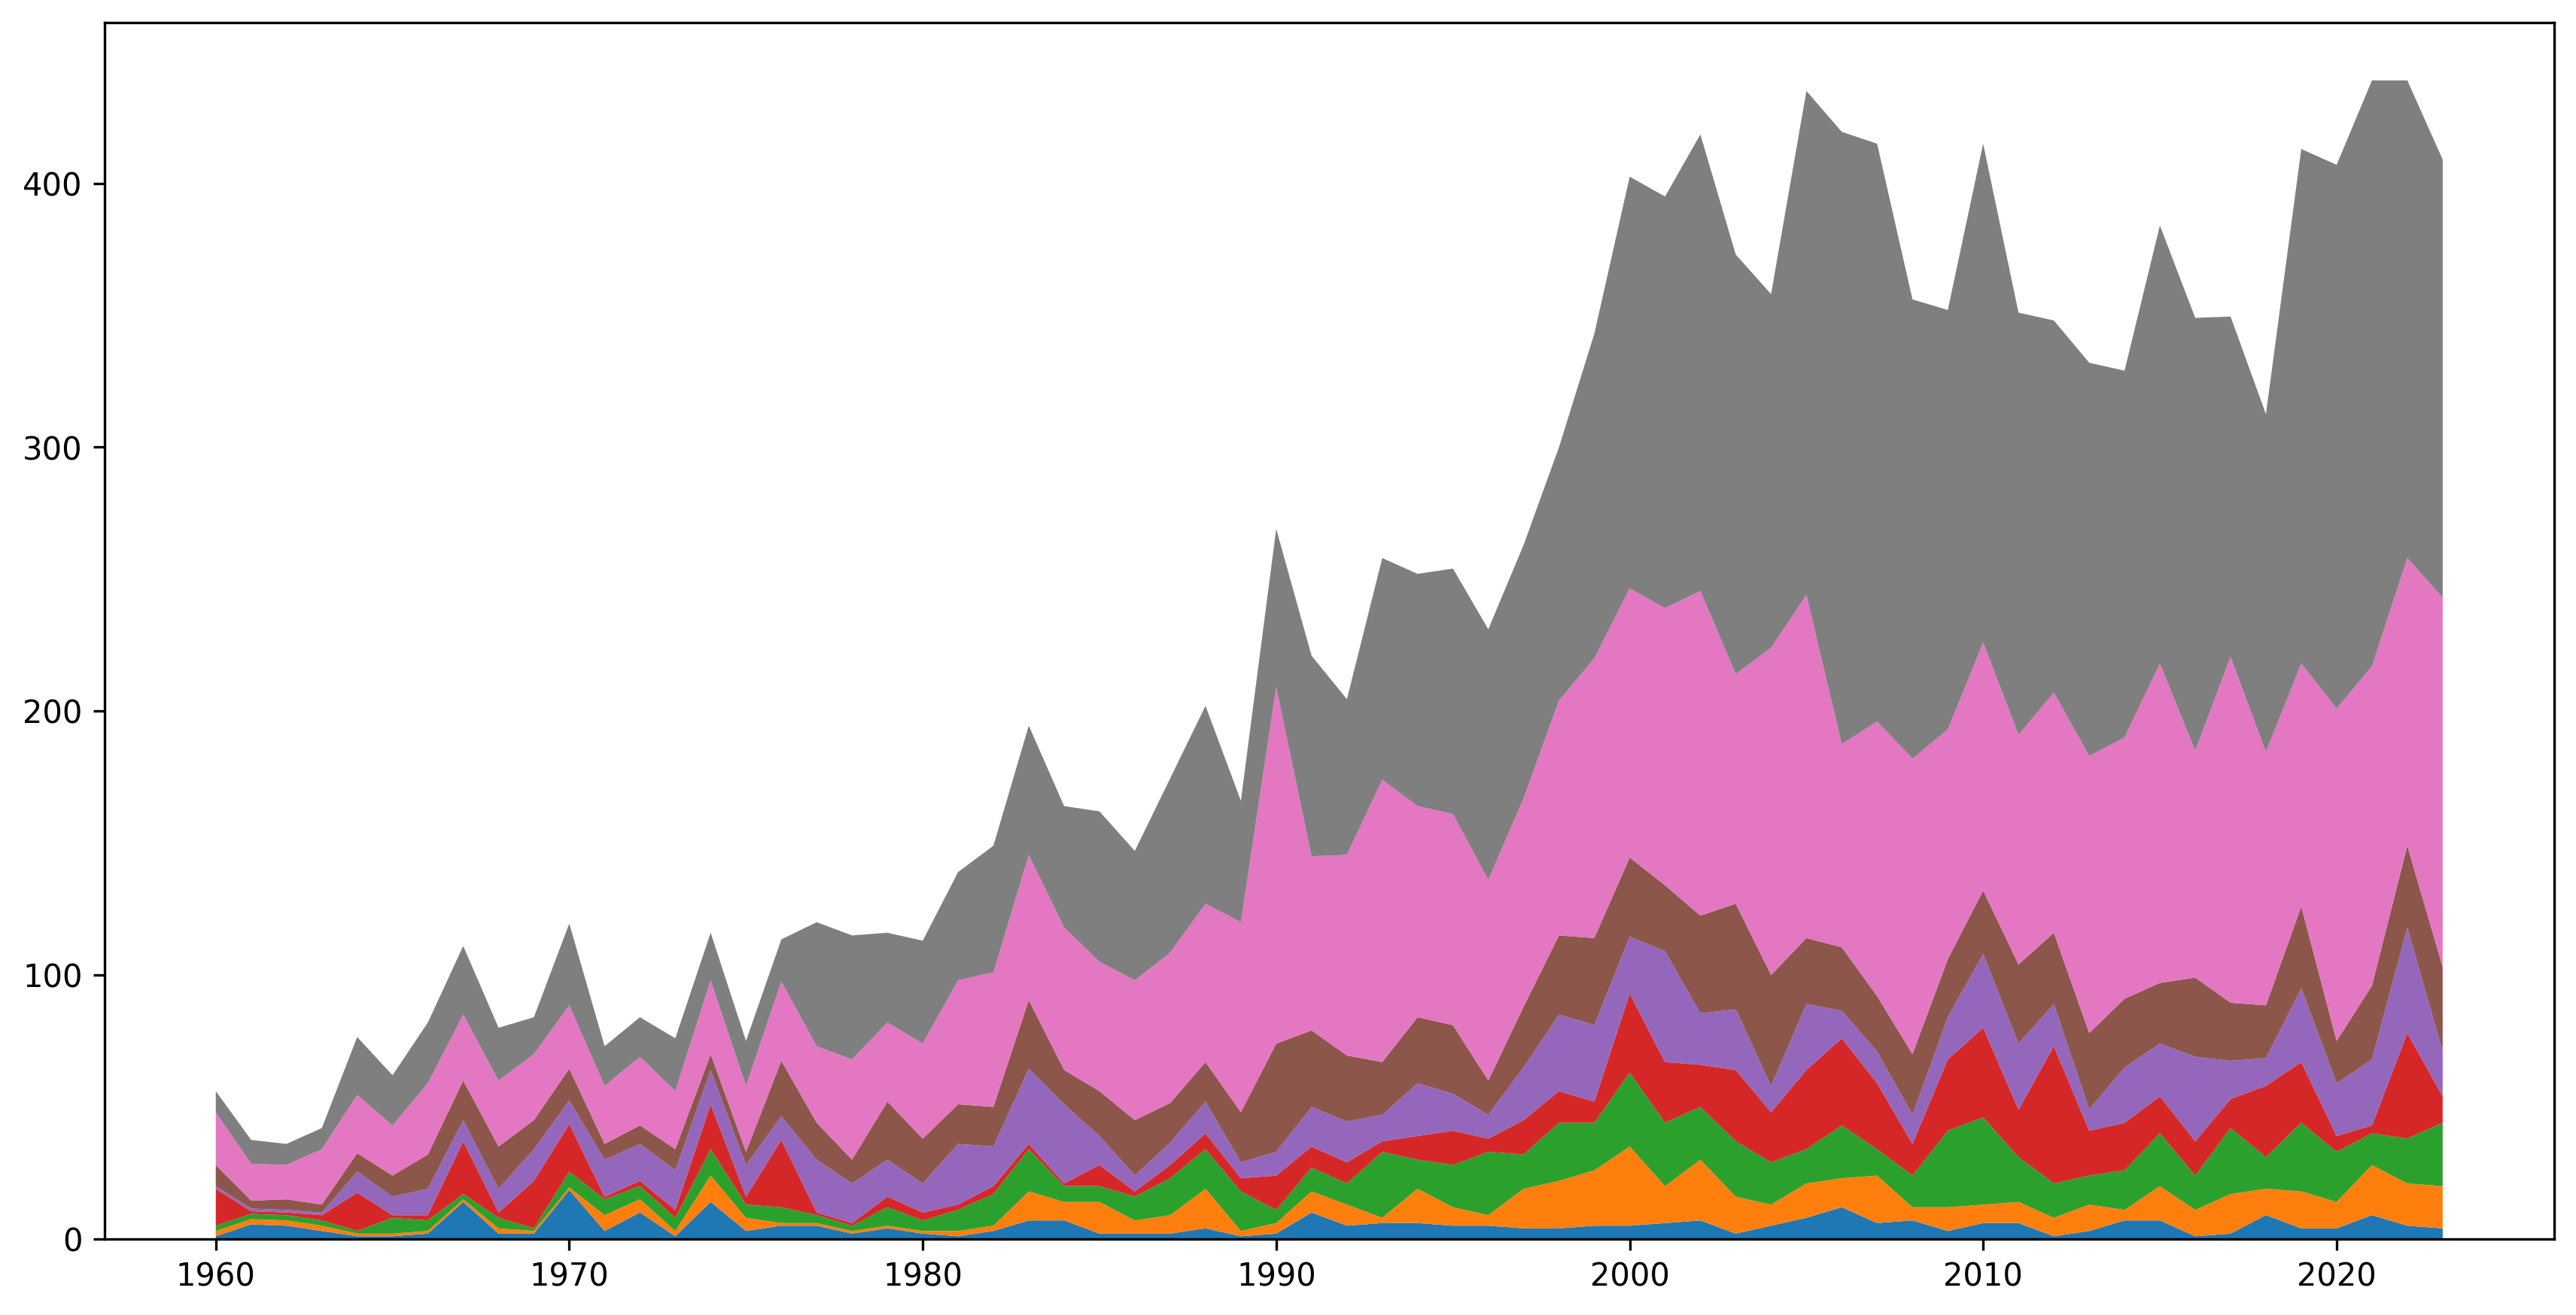

In [3]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# display the plot
plt.savefig('stacked-area-1.png', dpi=300, bbox_inches='tight')
plt.show()

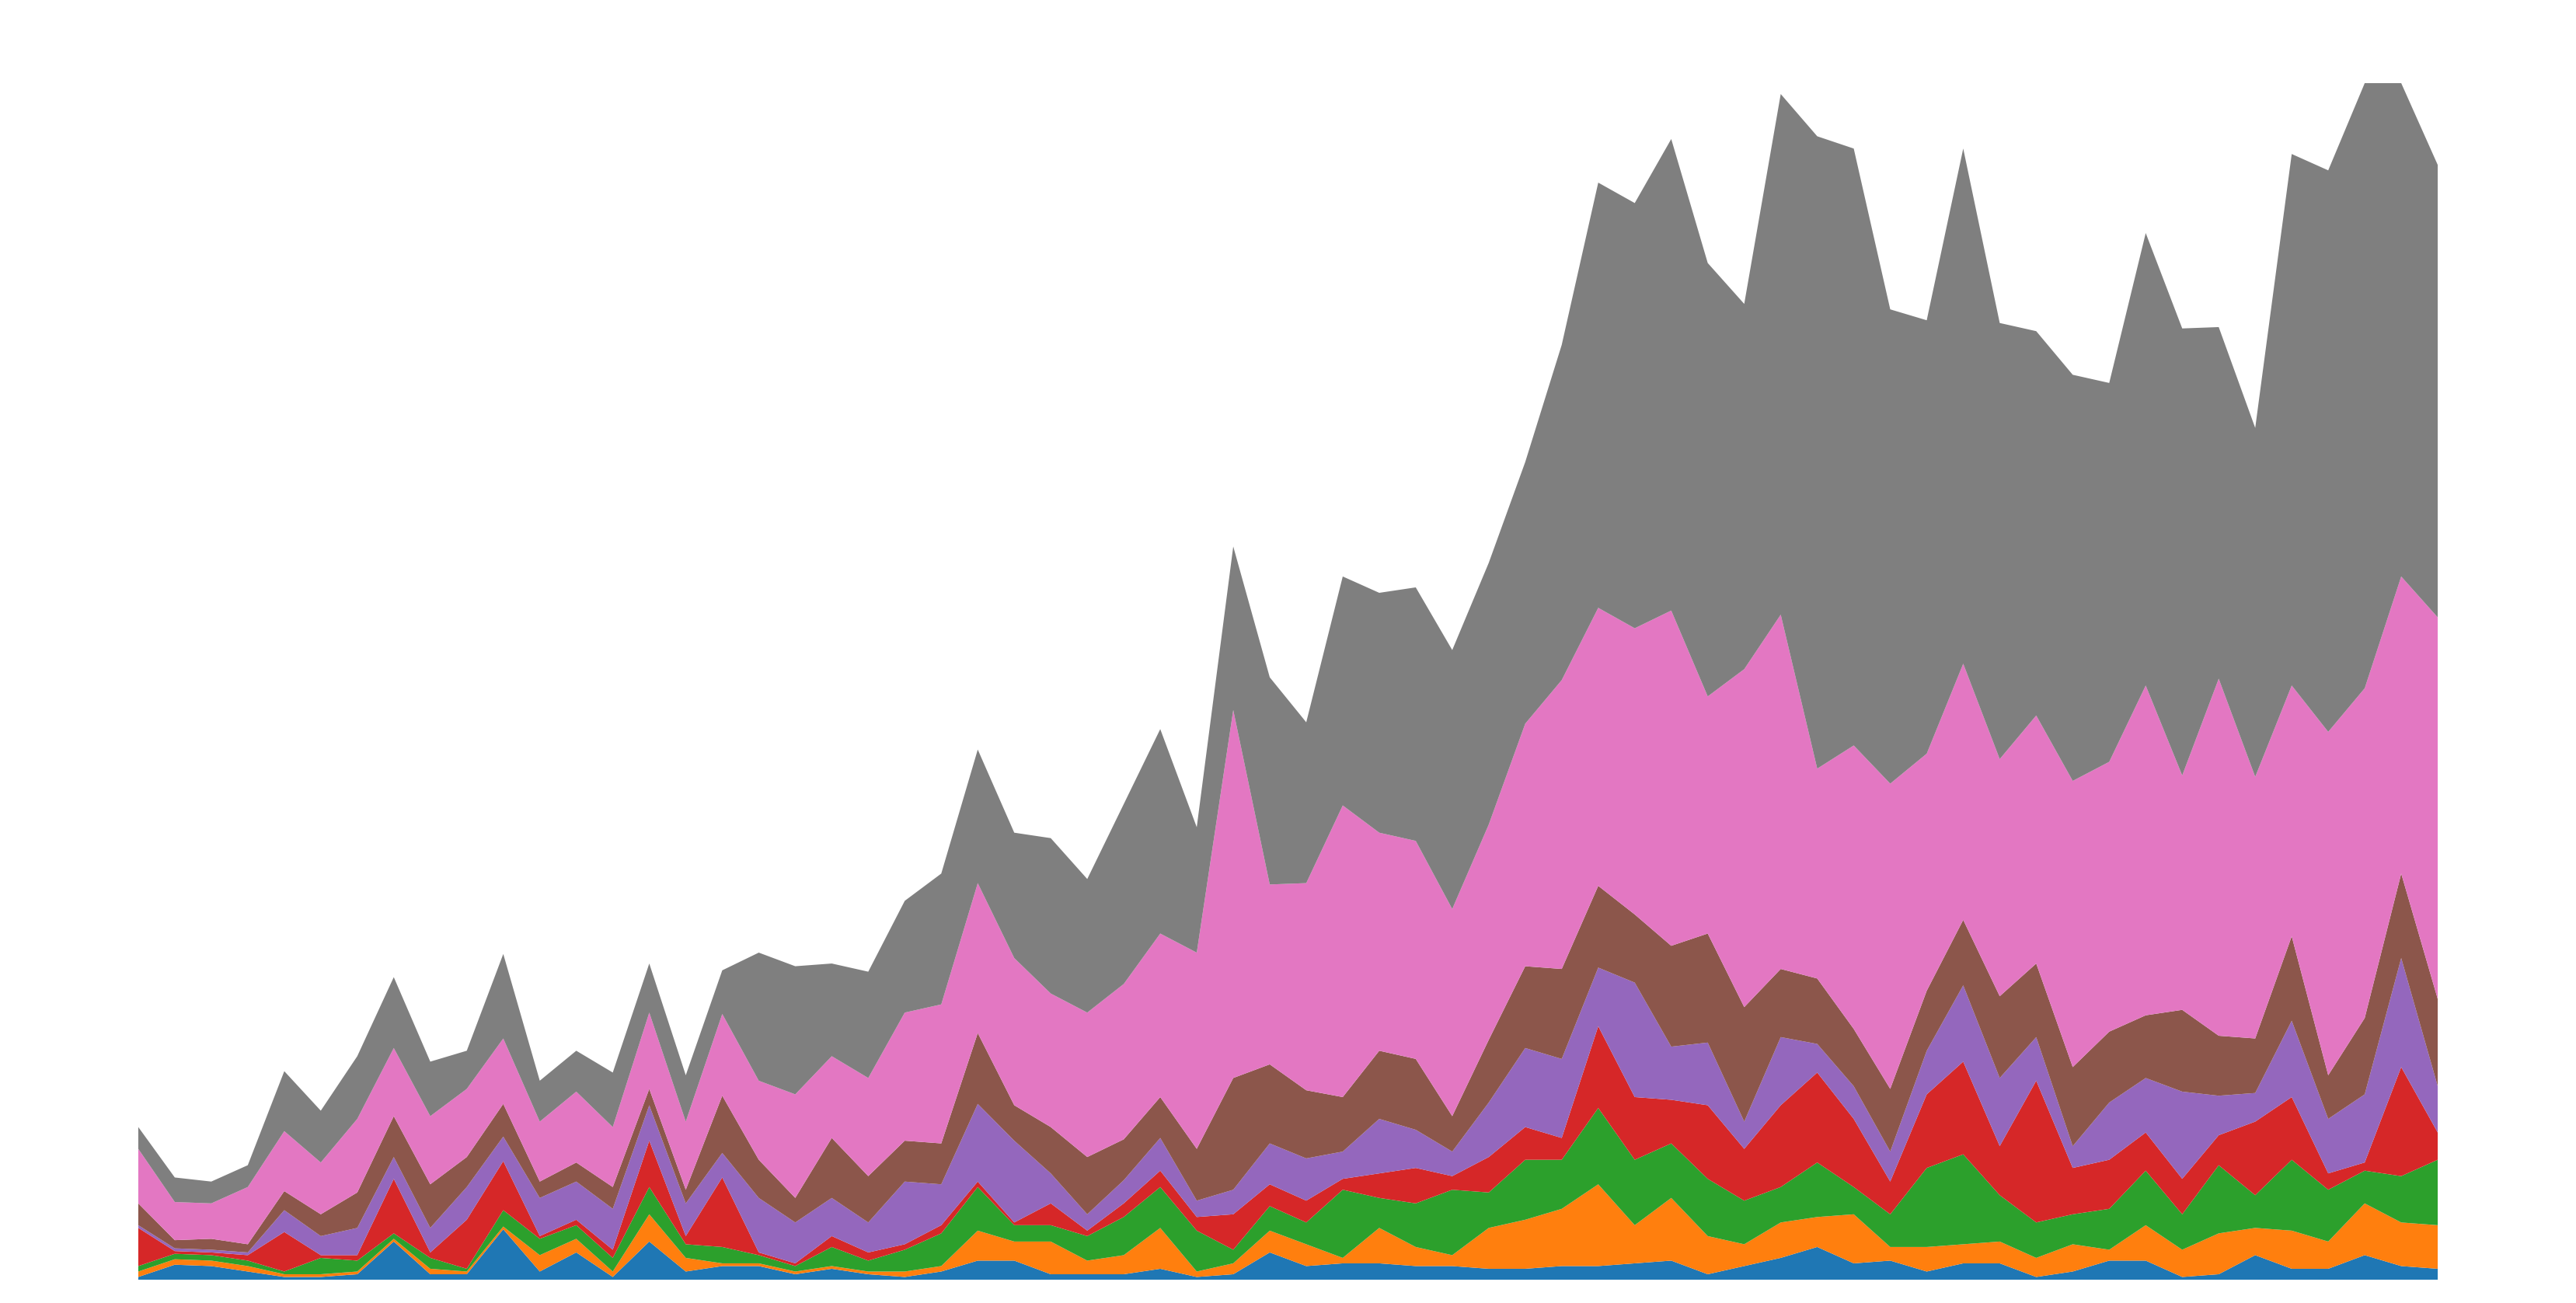

In [4]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# display the plot
plt.savefig('stacked-area-2.png', dpi=300, bbox_inches='tight')
plt.show()

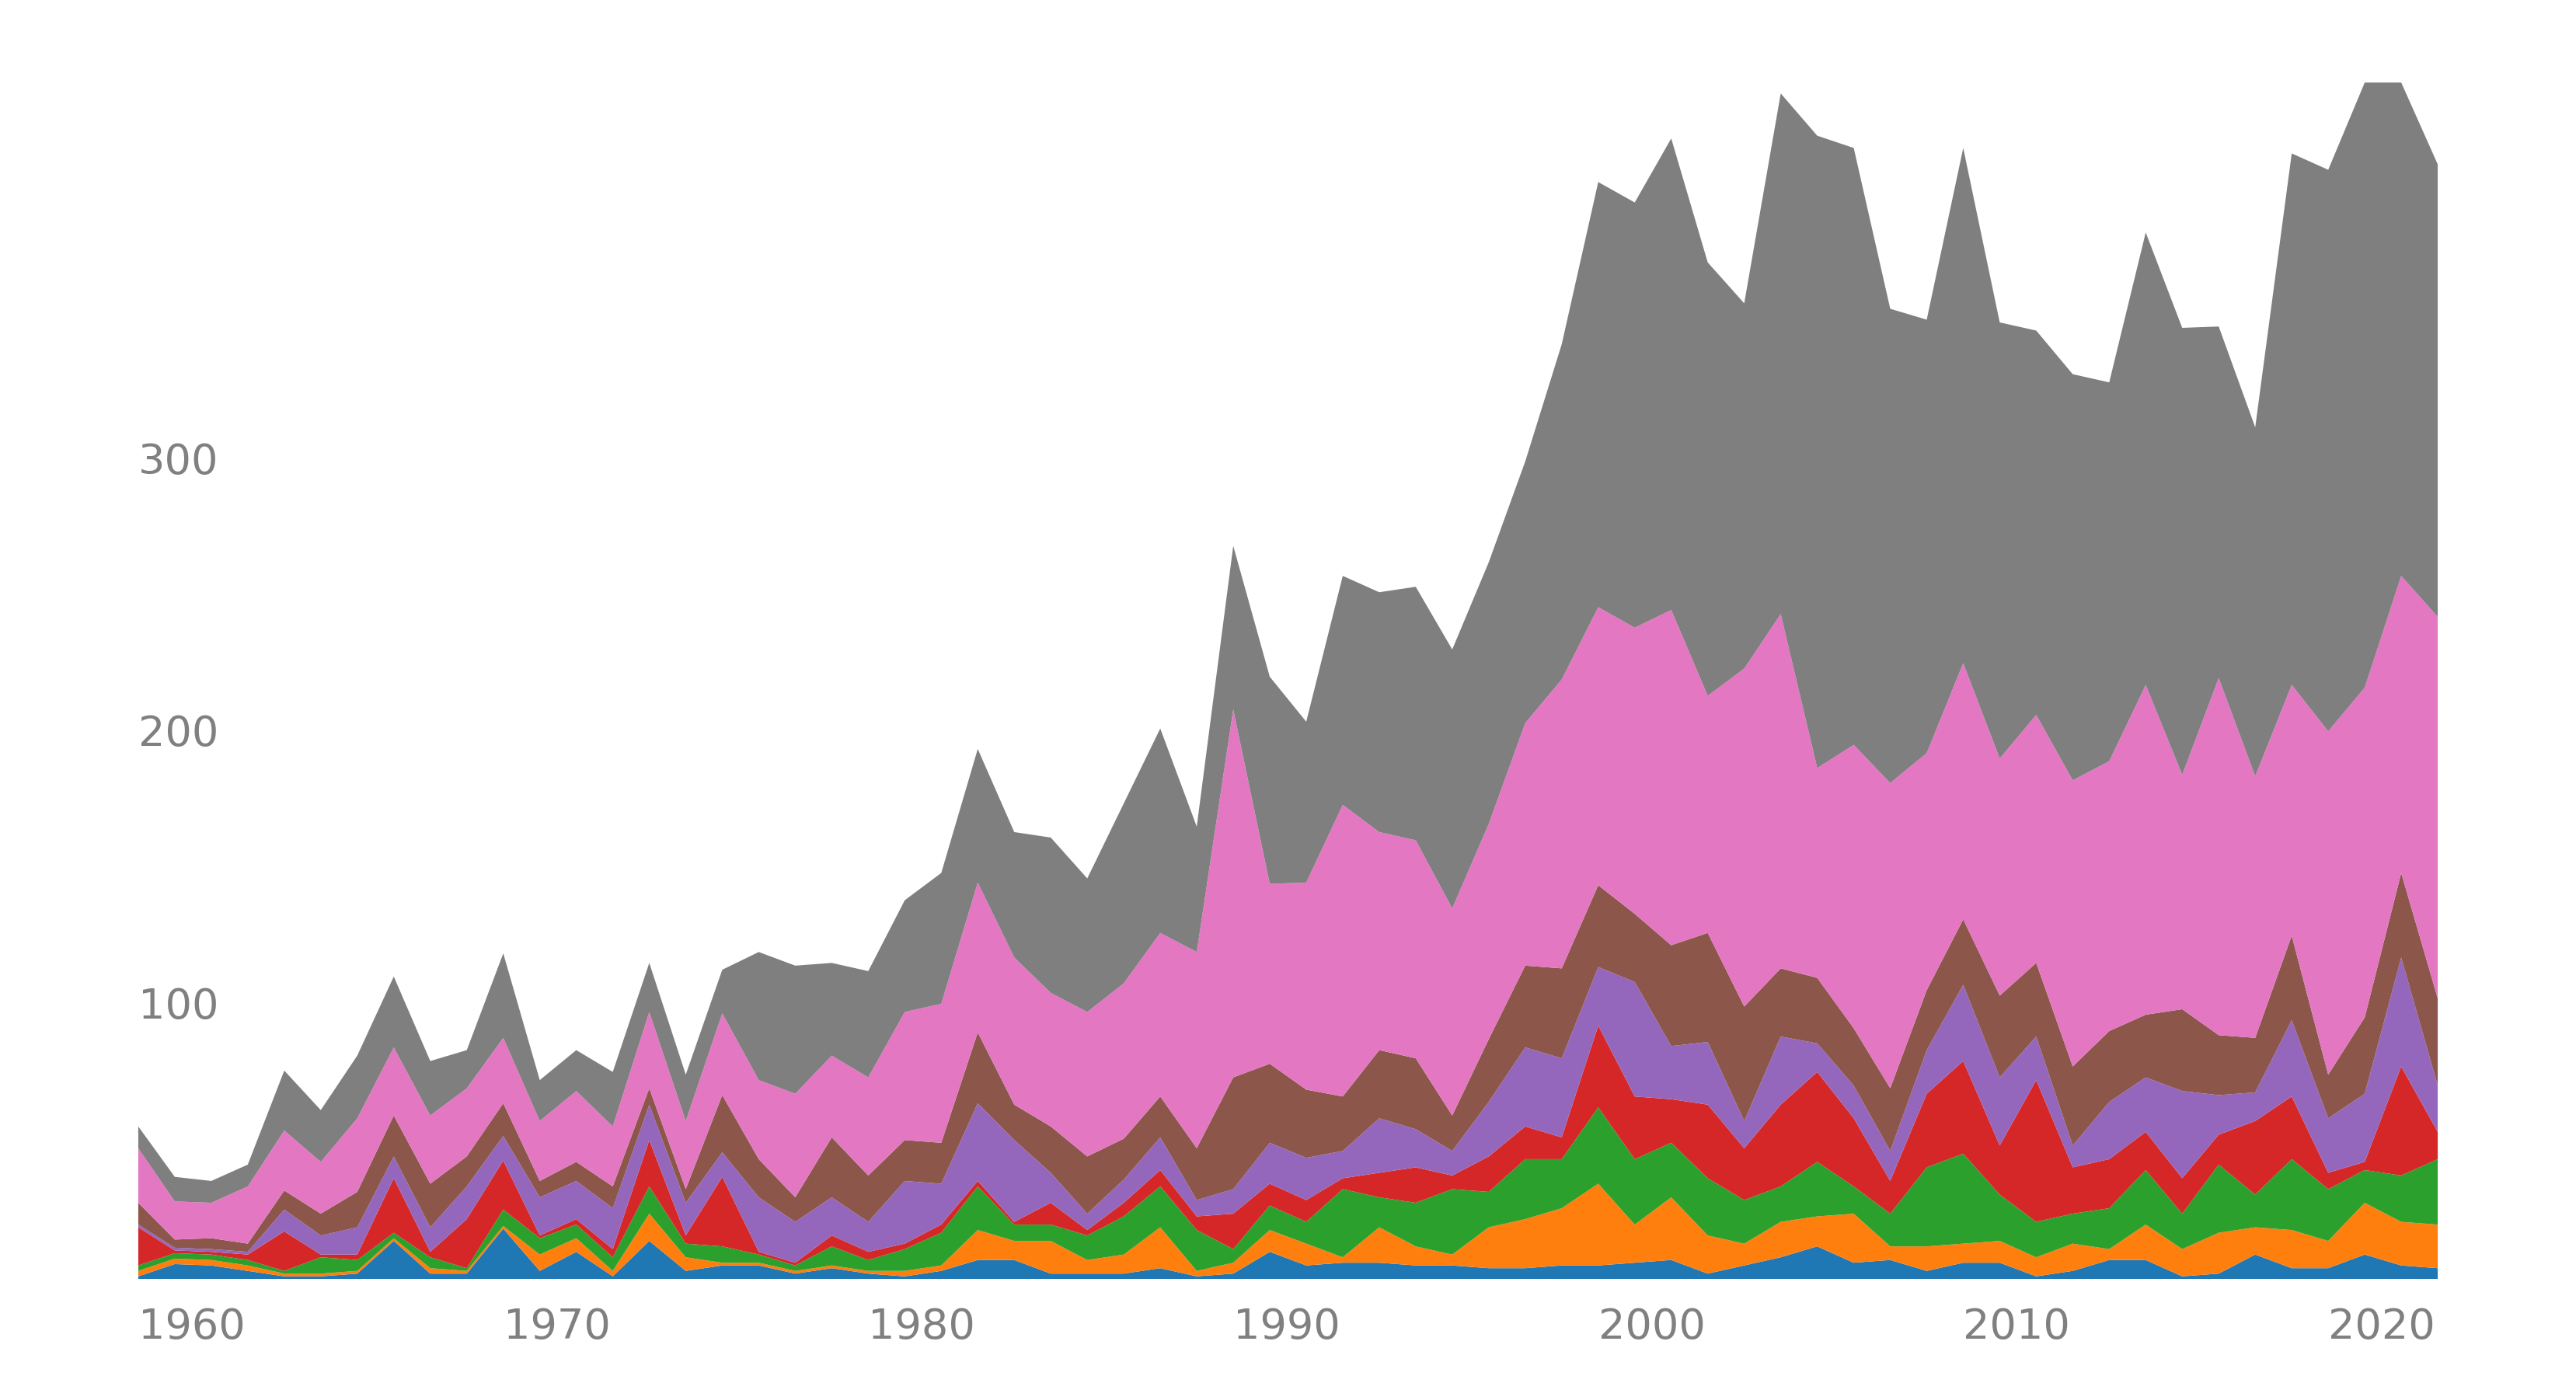

In [5]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13,
      color='grey'
   )

# display the plot
plt.savefig('stacked-area-3.png', dpi=300, bbox_inches='tight')
plt.show()

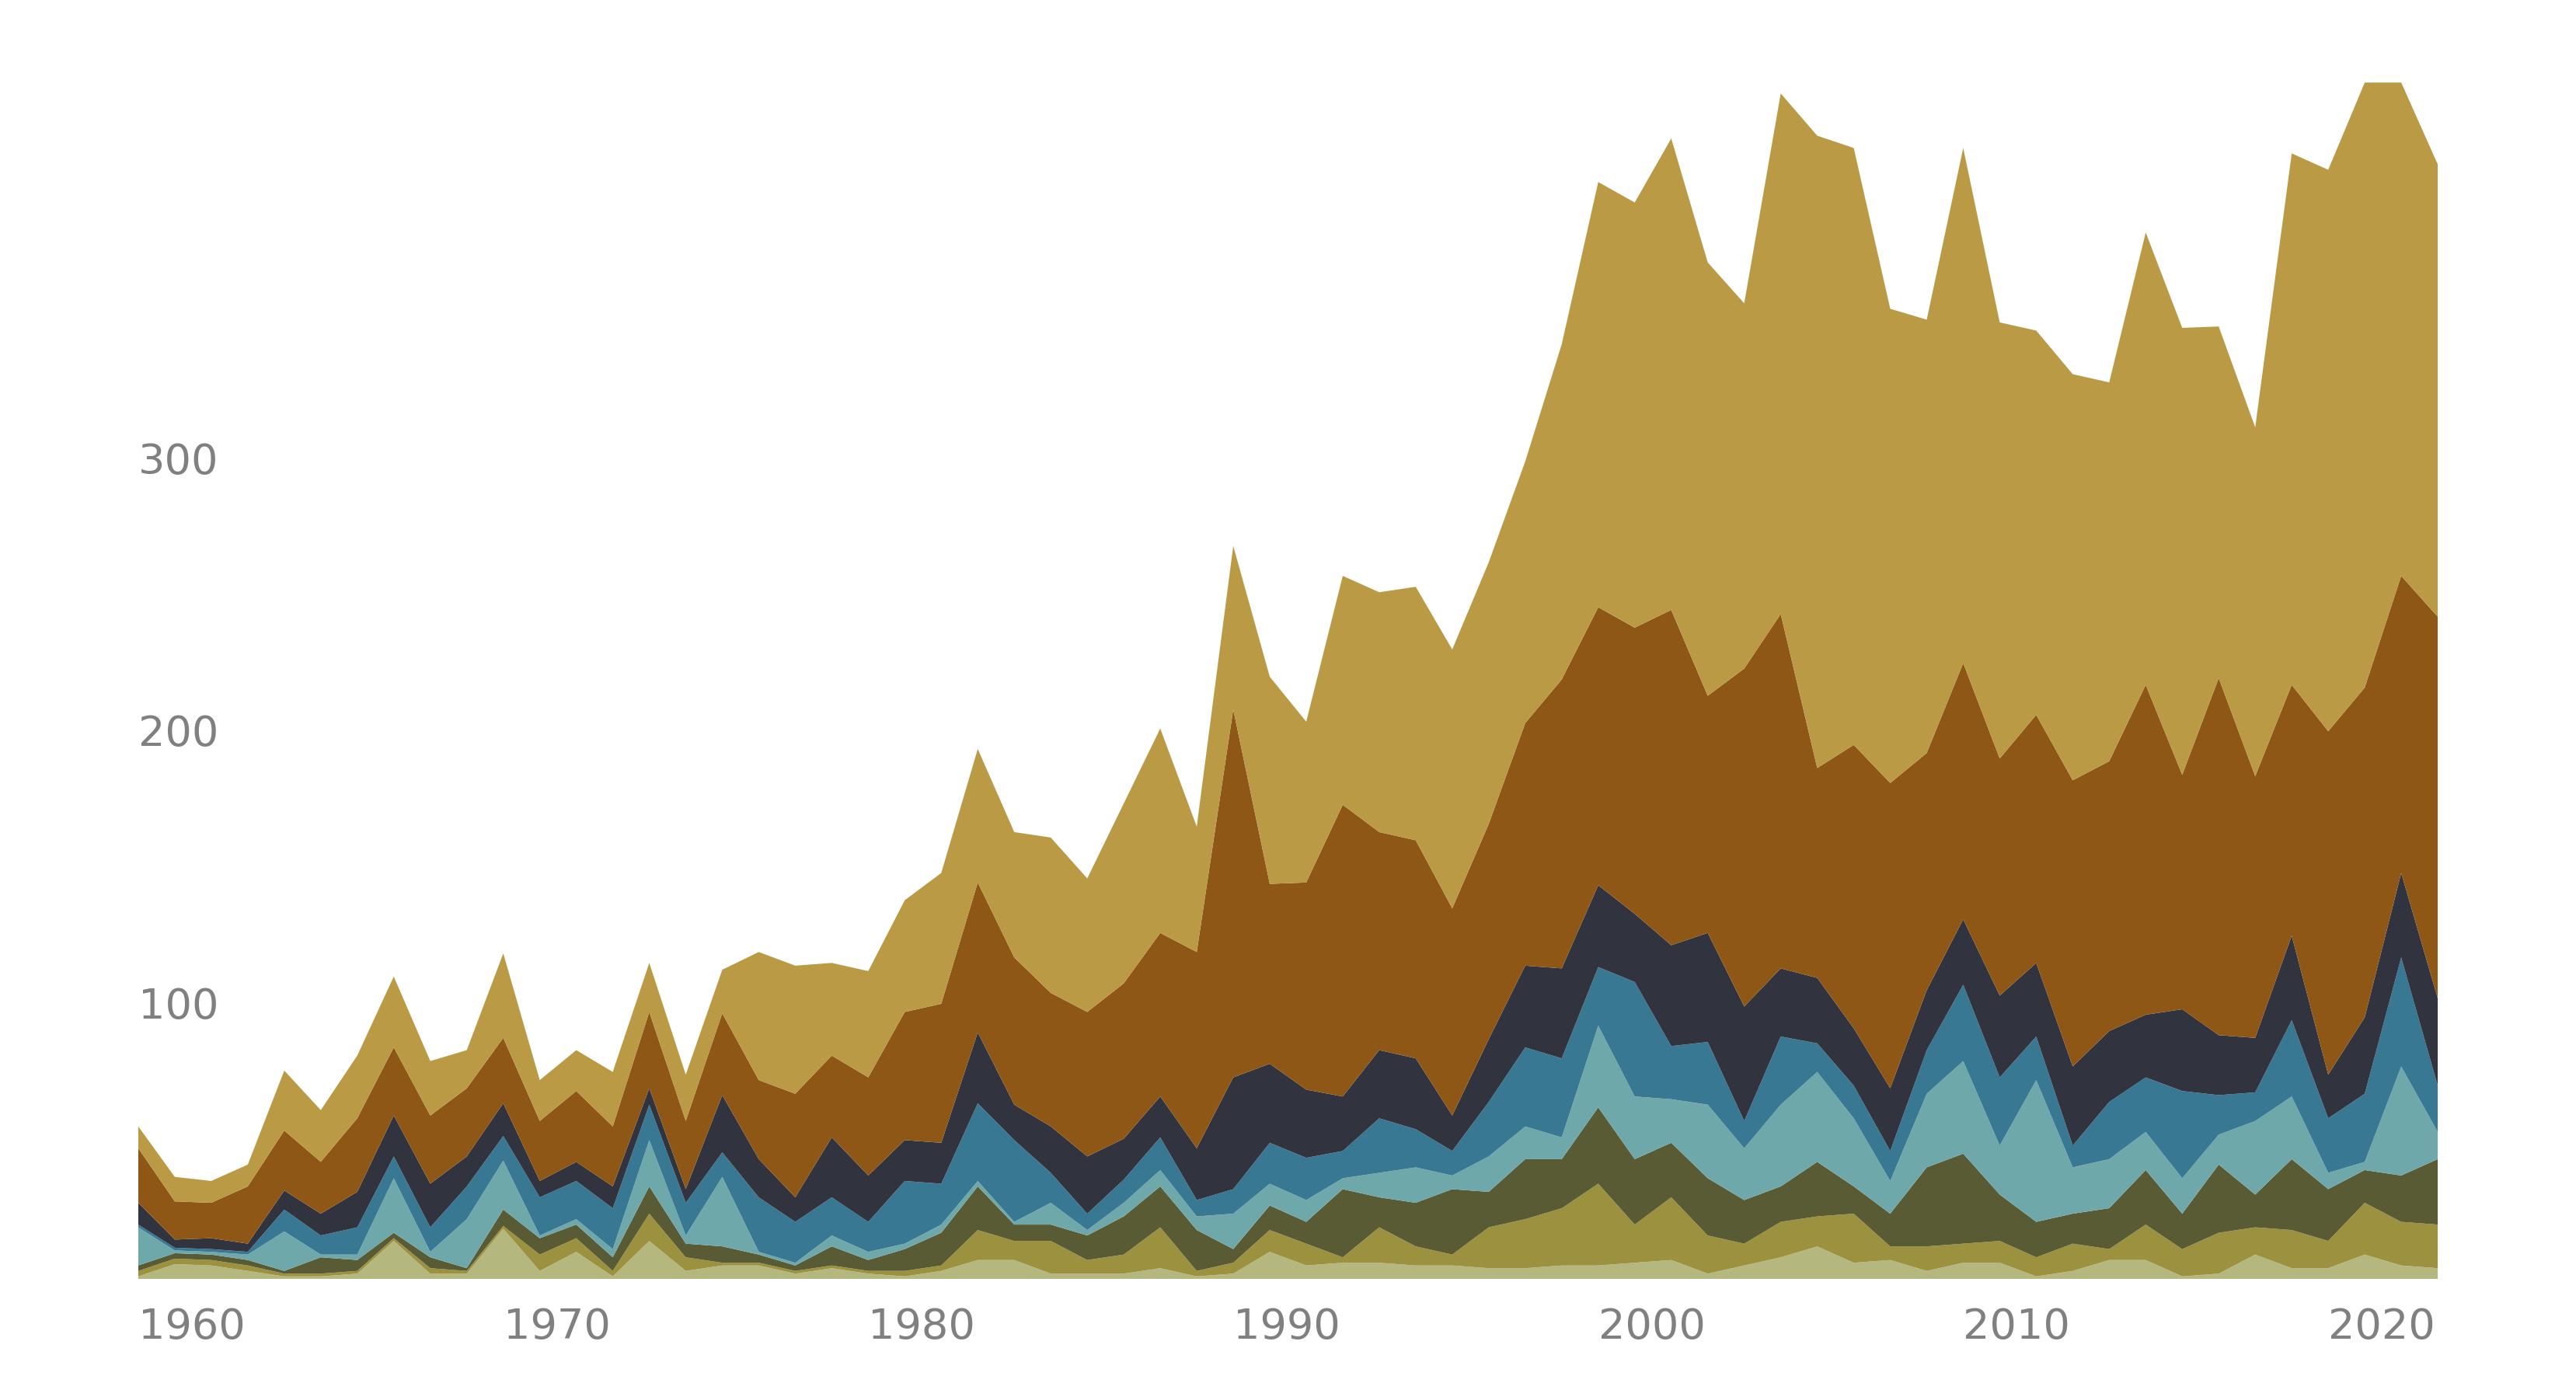

In [6]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13,
      color='grey'
   )

# display the plot
plt.savefig('stacked-area-4.png', dpi=300, bbox_inches='tight')
plt.show()

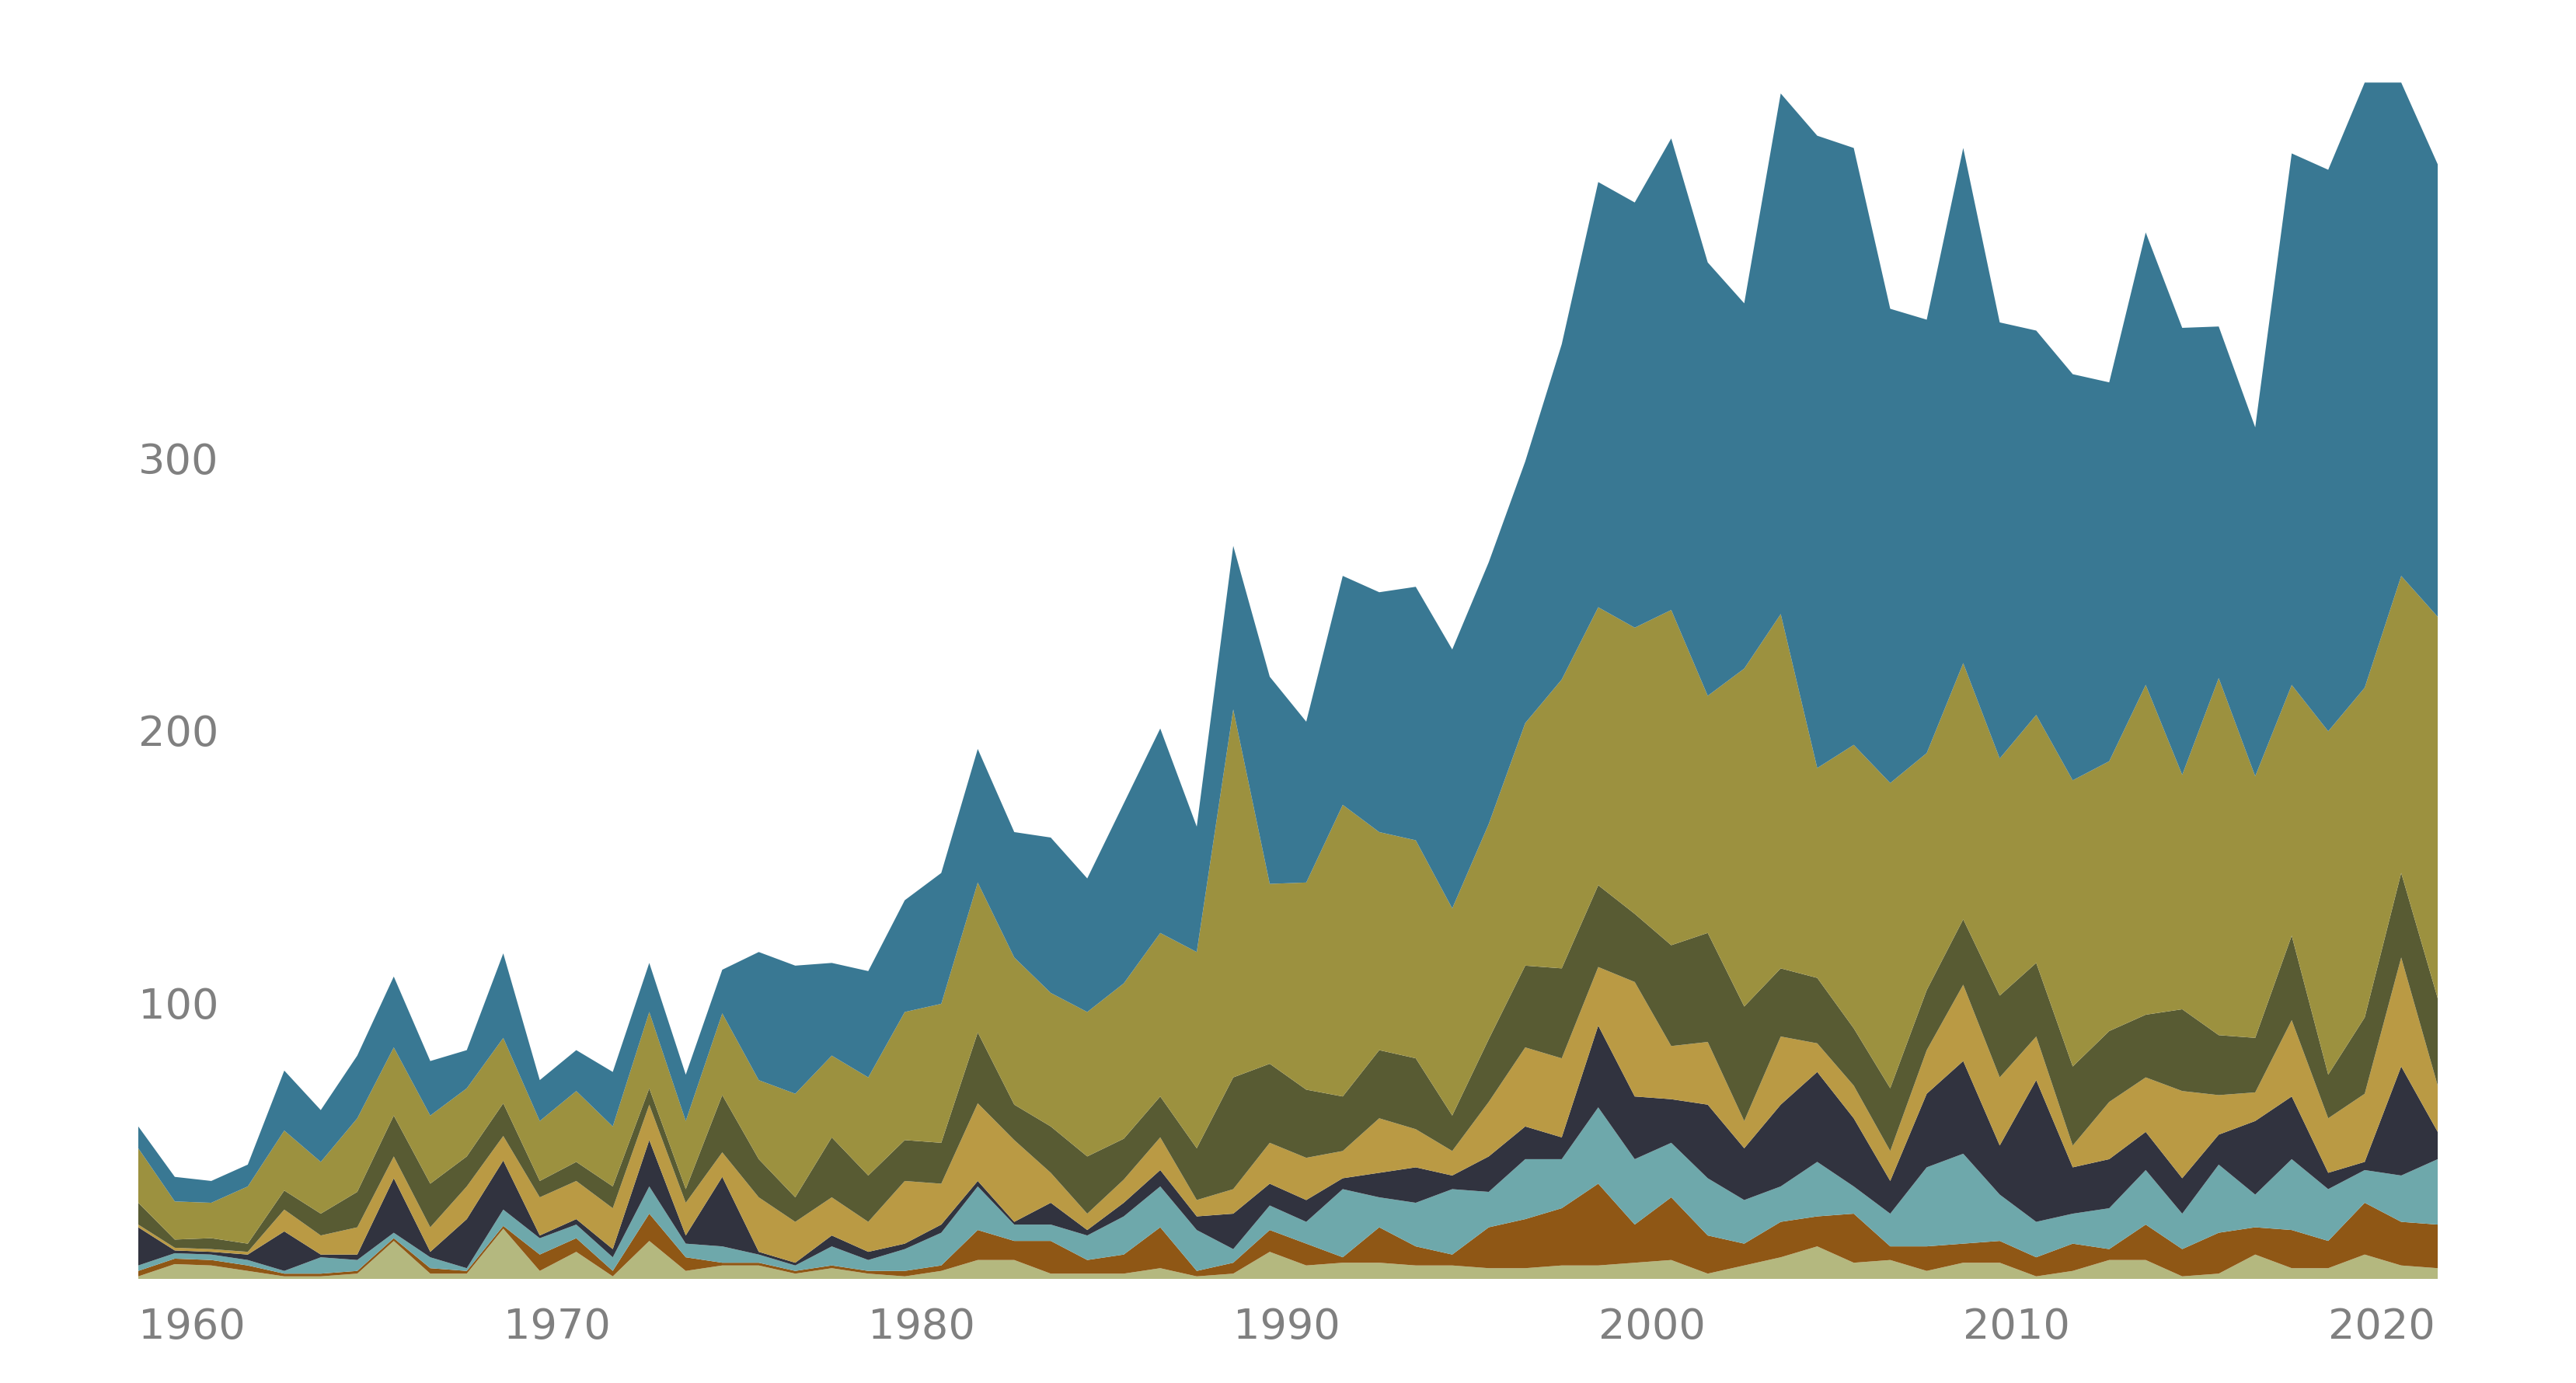

In [7]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13,
      color='grey'
   )

# display the plot
plt.savefig('stacked-area-5.png', dpi=300, bbox_inches='tight')
plt.show()

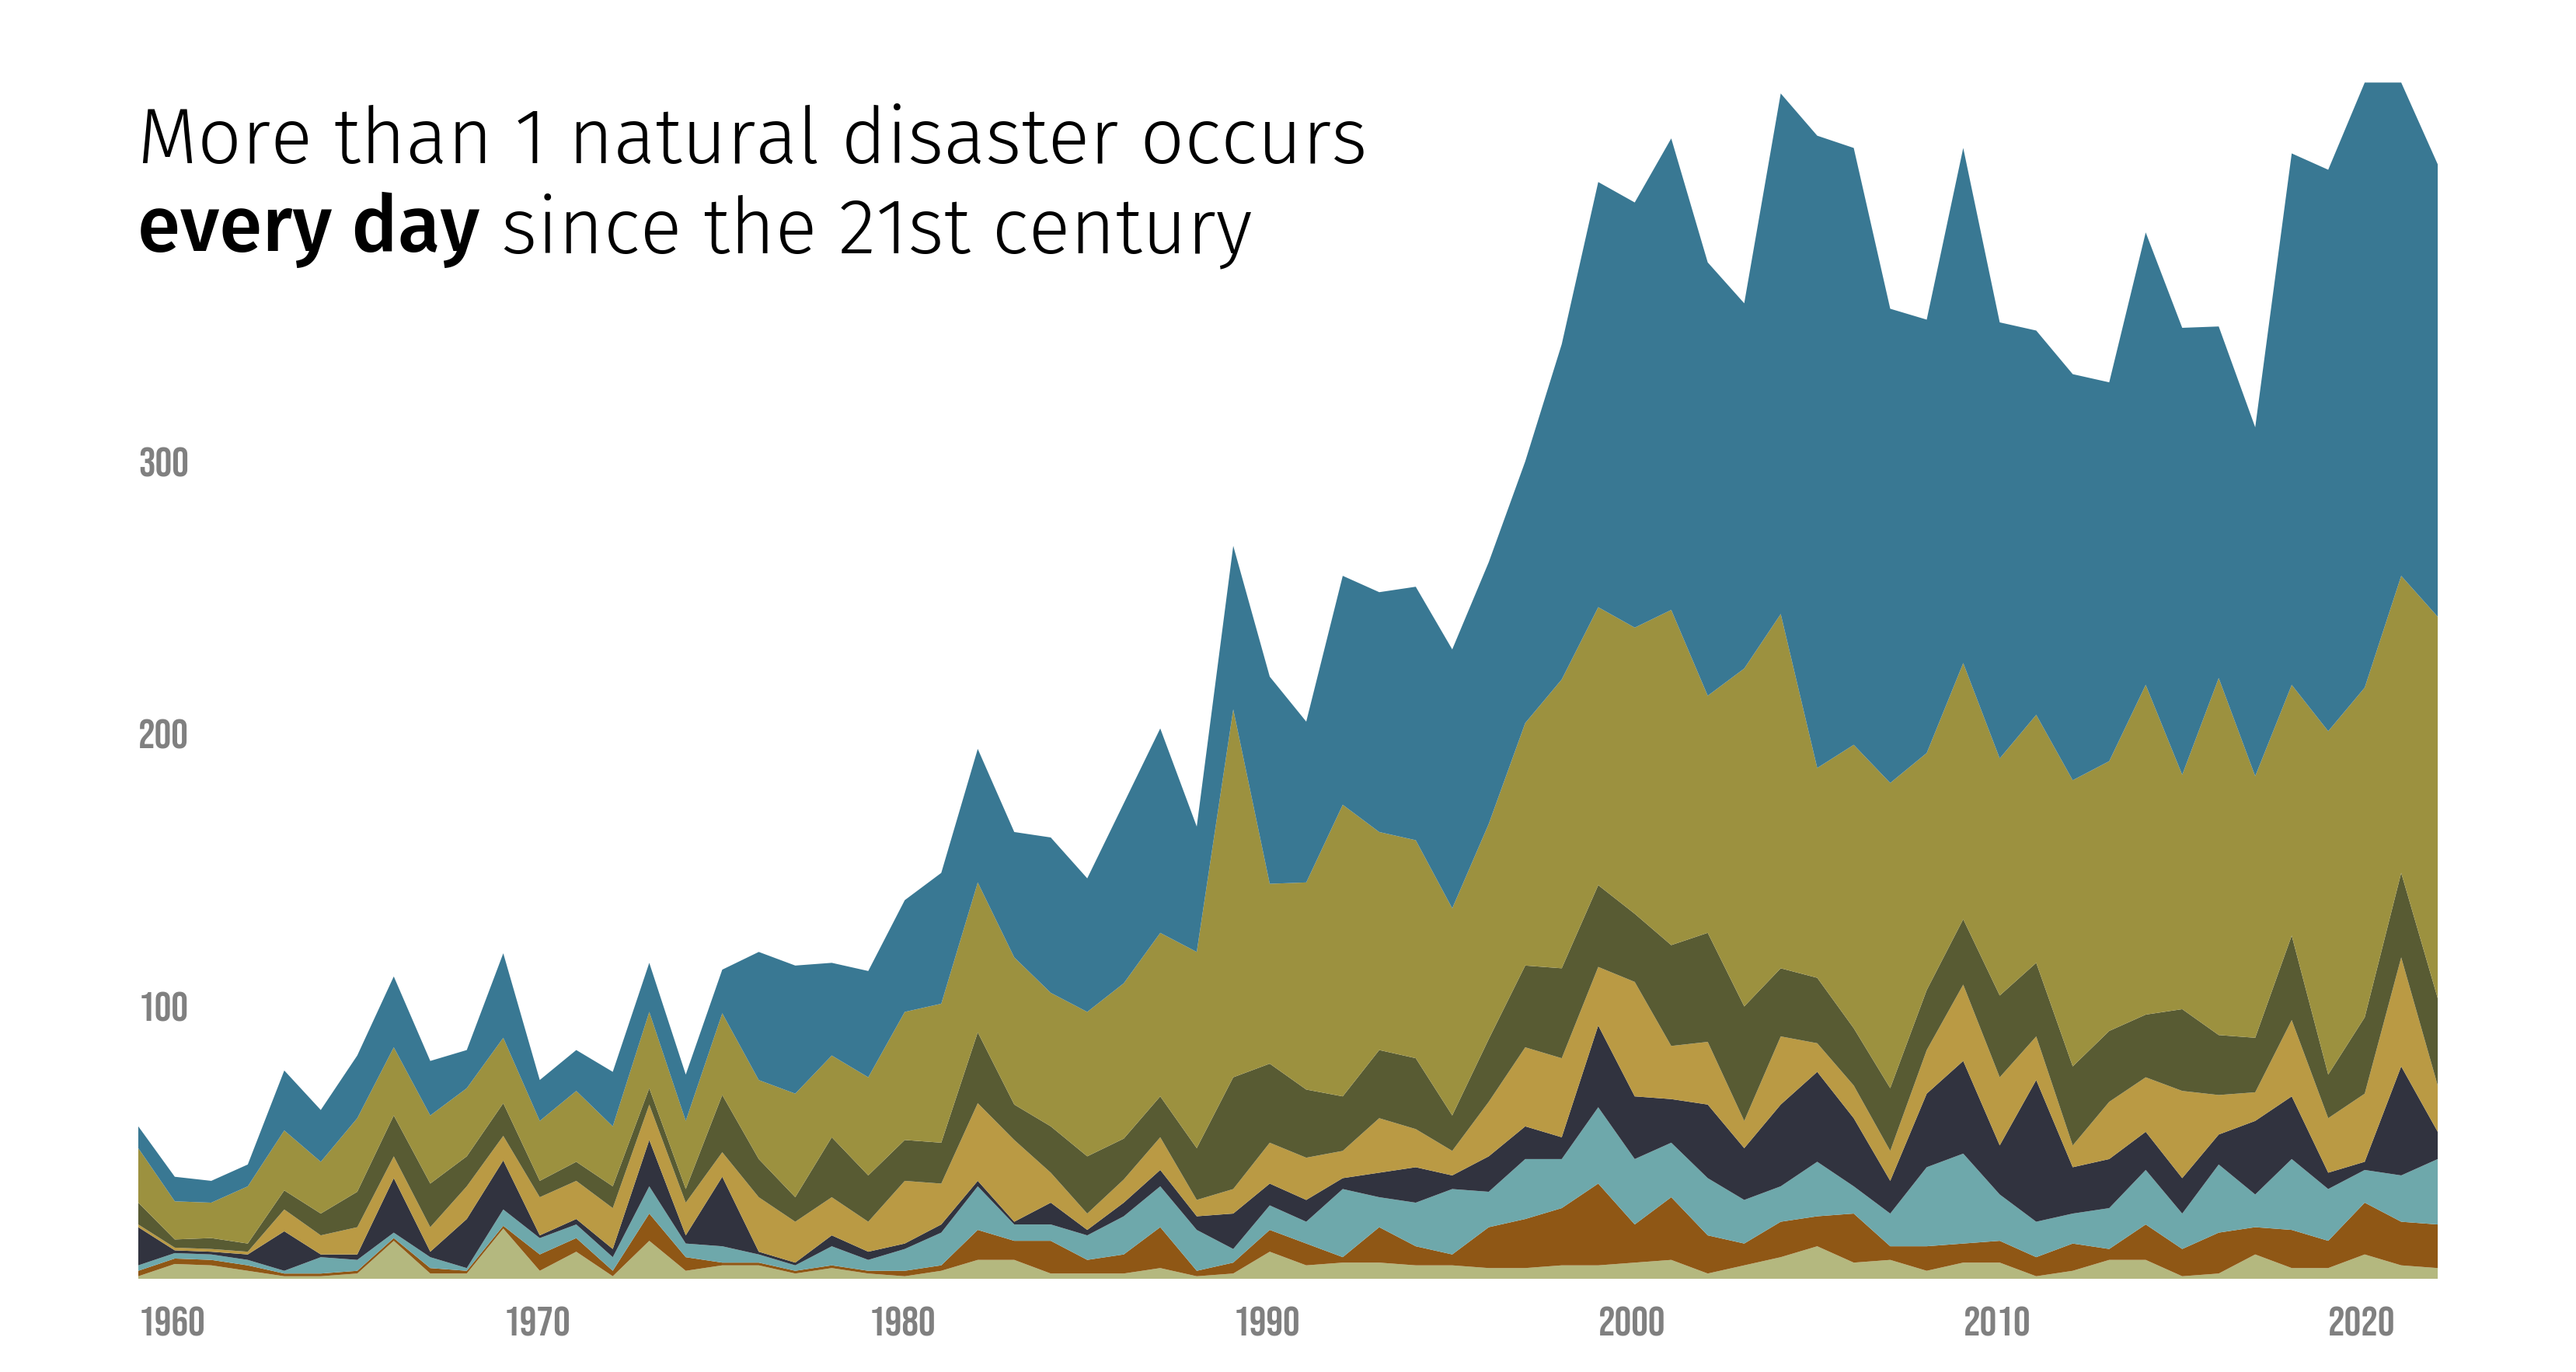

In [8]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# display the plot
plt.savefig('stacked-area-6.png', dpi=300, bbox_inches='tight')
plt.show()

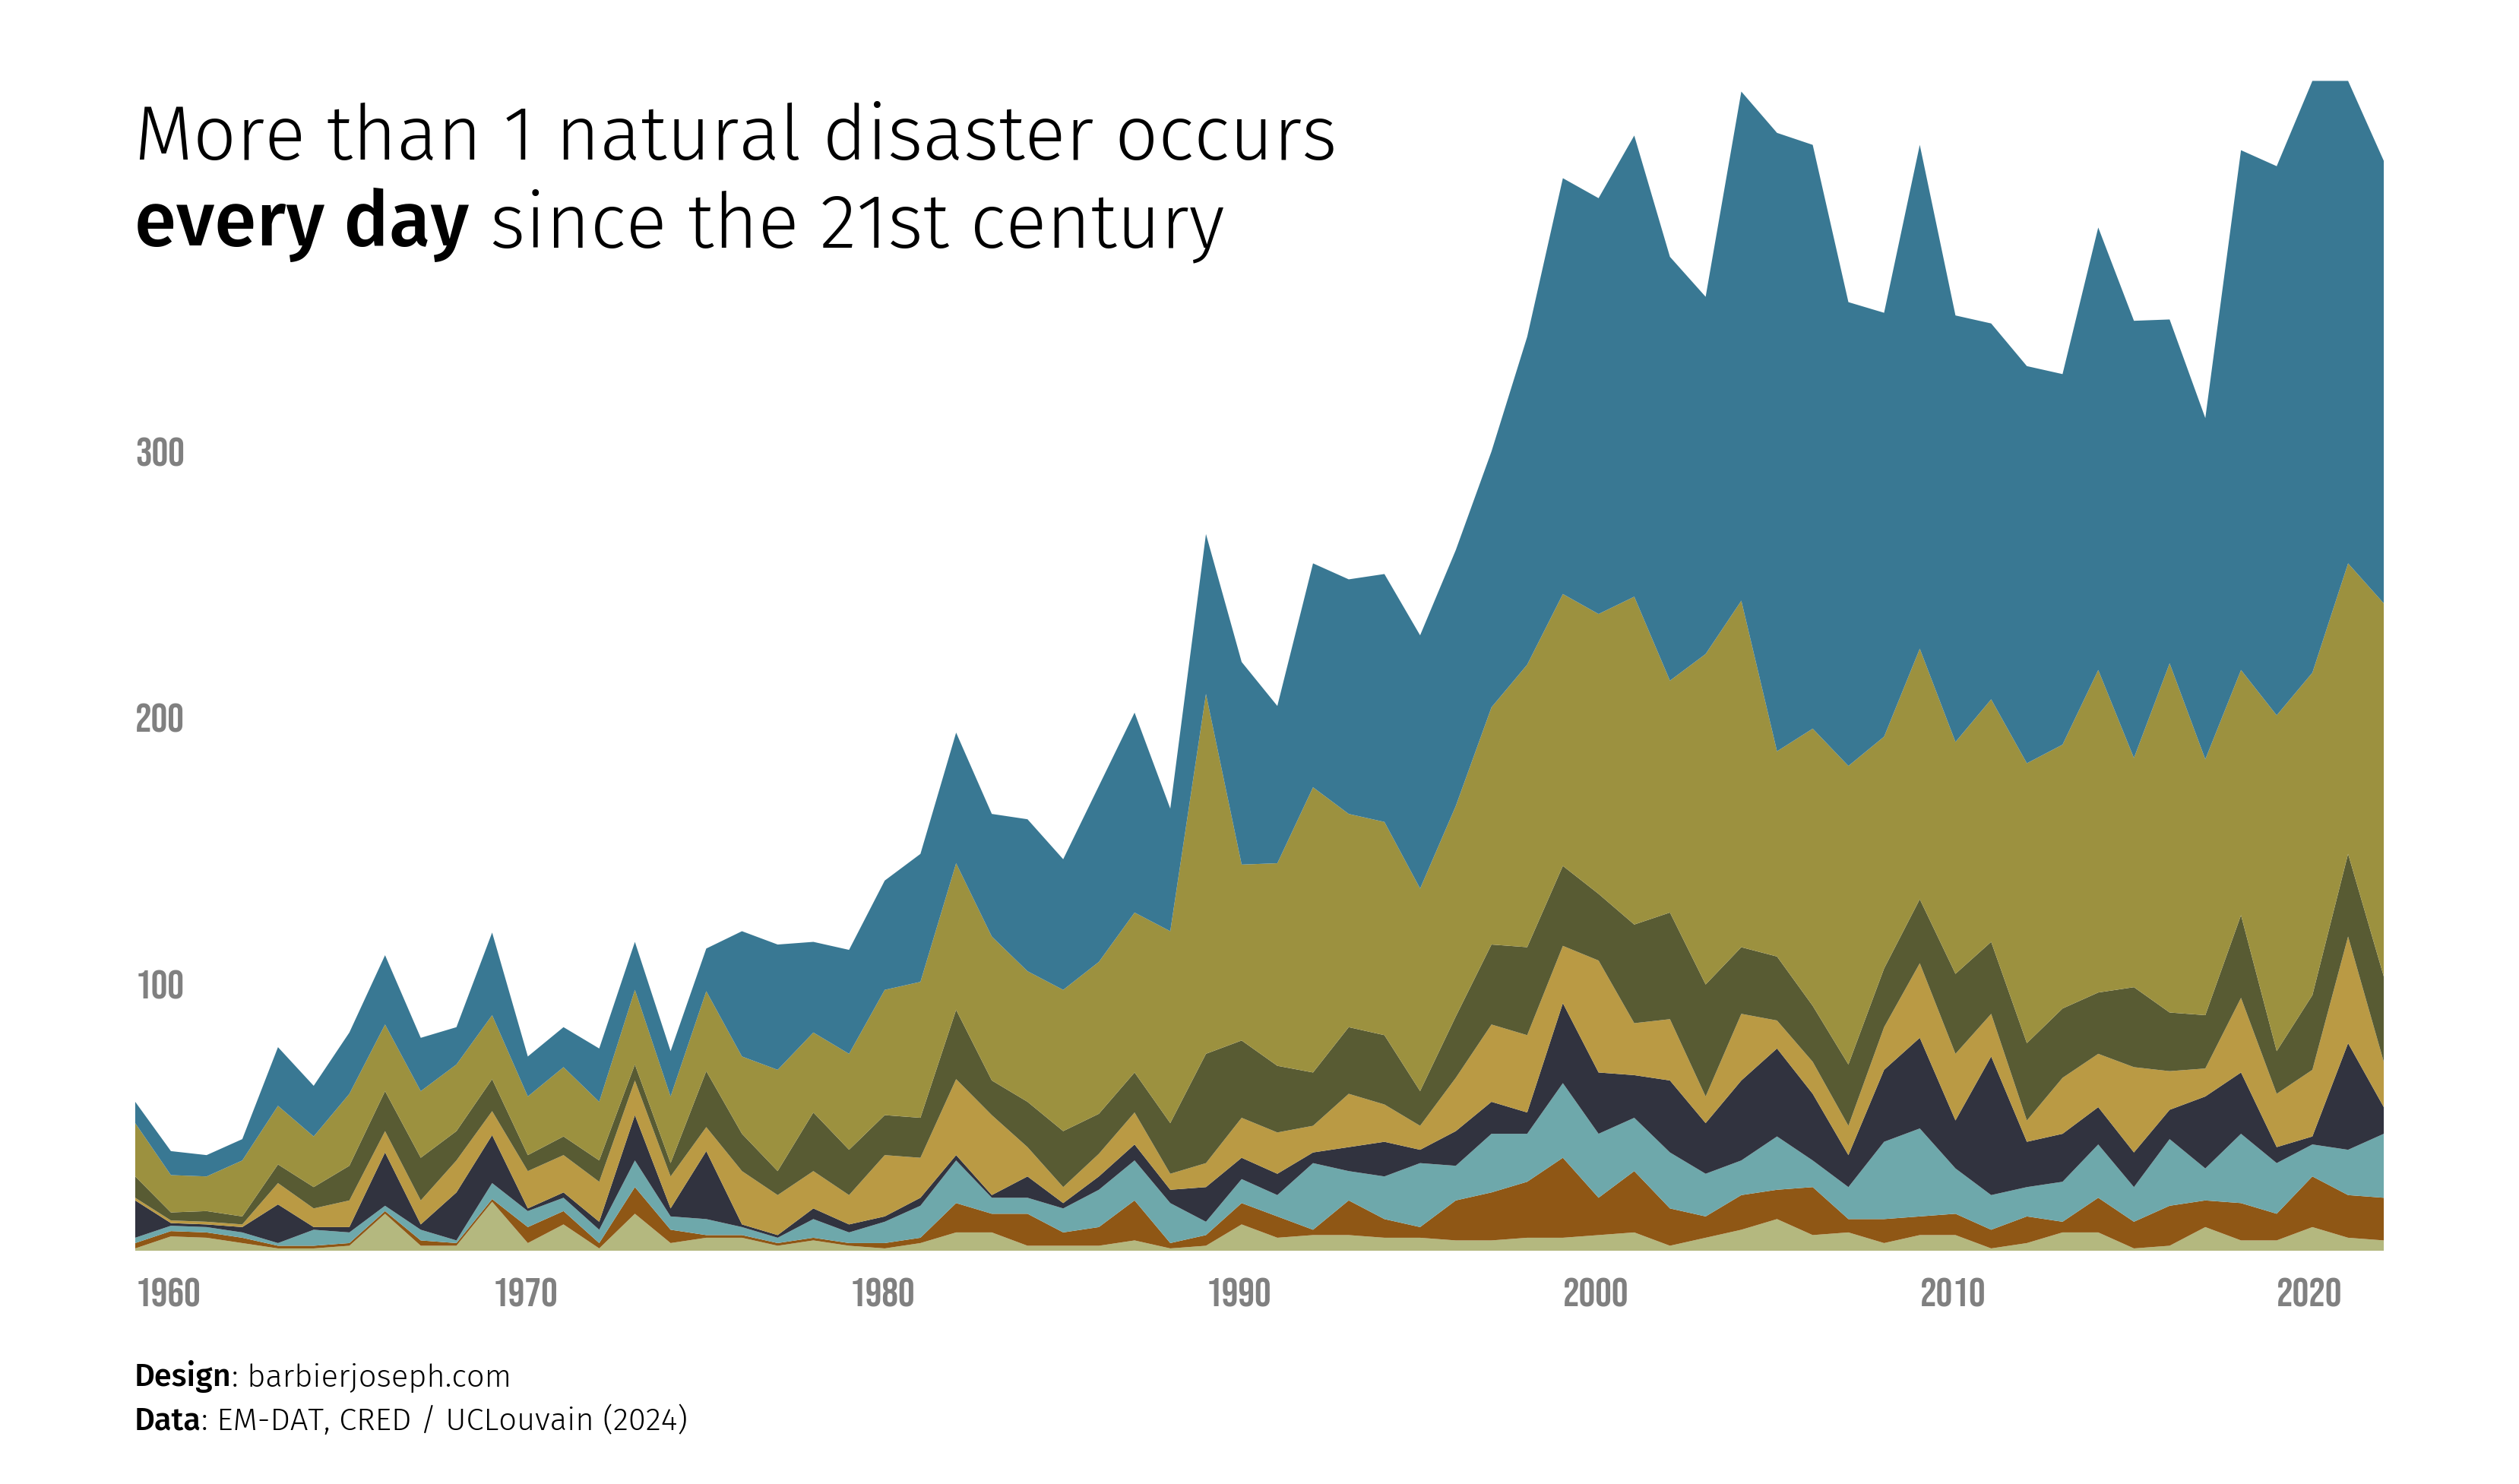

In [9]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# display the plot
plt.savefig('stacked-area-7.png', dpi=300, bbox_inches='tight')
plt.show()

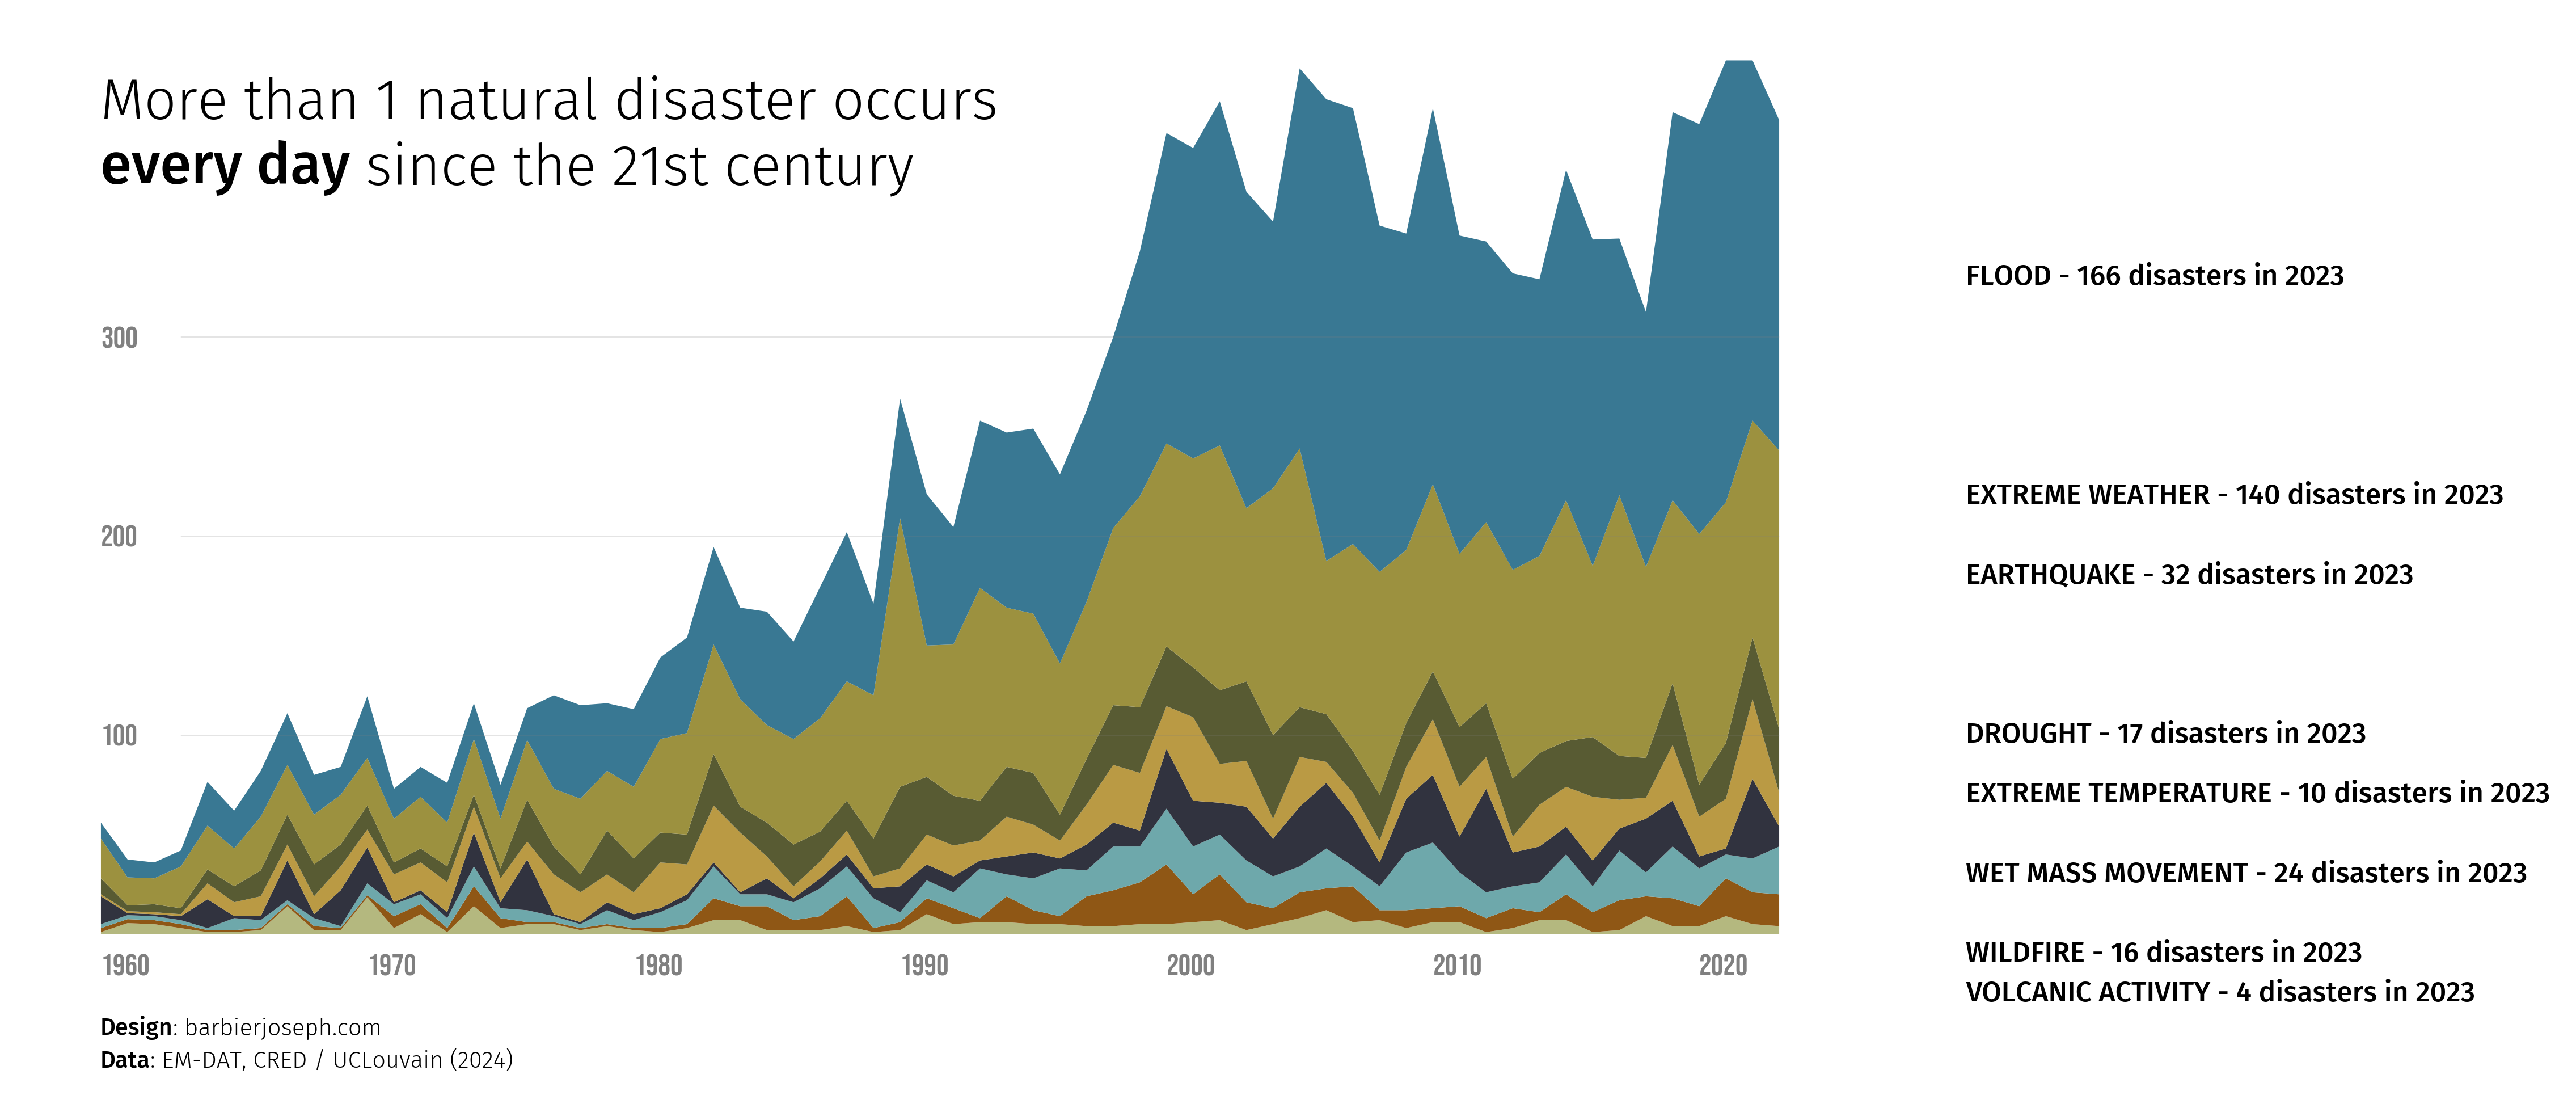

In [10]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.1)

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   country = columns[::-1][i]
   val_2023 = int(df.loc[2023, country])
   ax_text(
      x=2030, y=y_pos[i], s=f"{country.upper()} - {val_2023} disasters in 2023",
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color='black'
   )

# display the plot
plt.savefig('stacked-area-8.png', dpi=300, bbox_inches='tight')
plt.show()

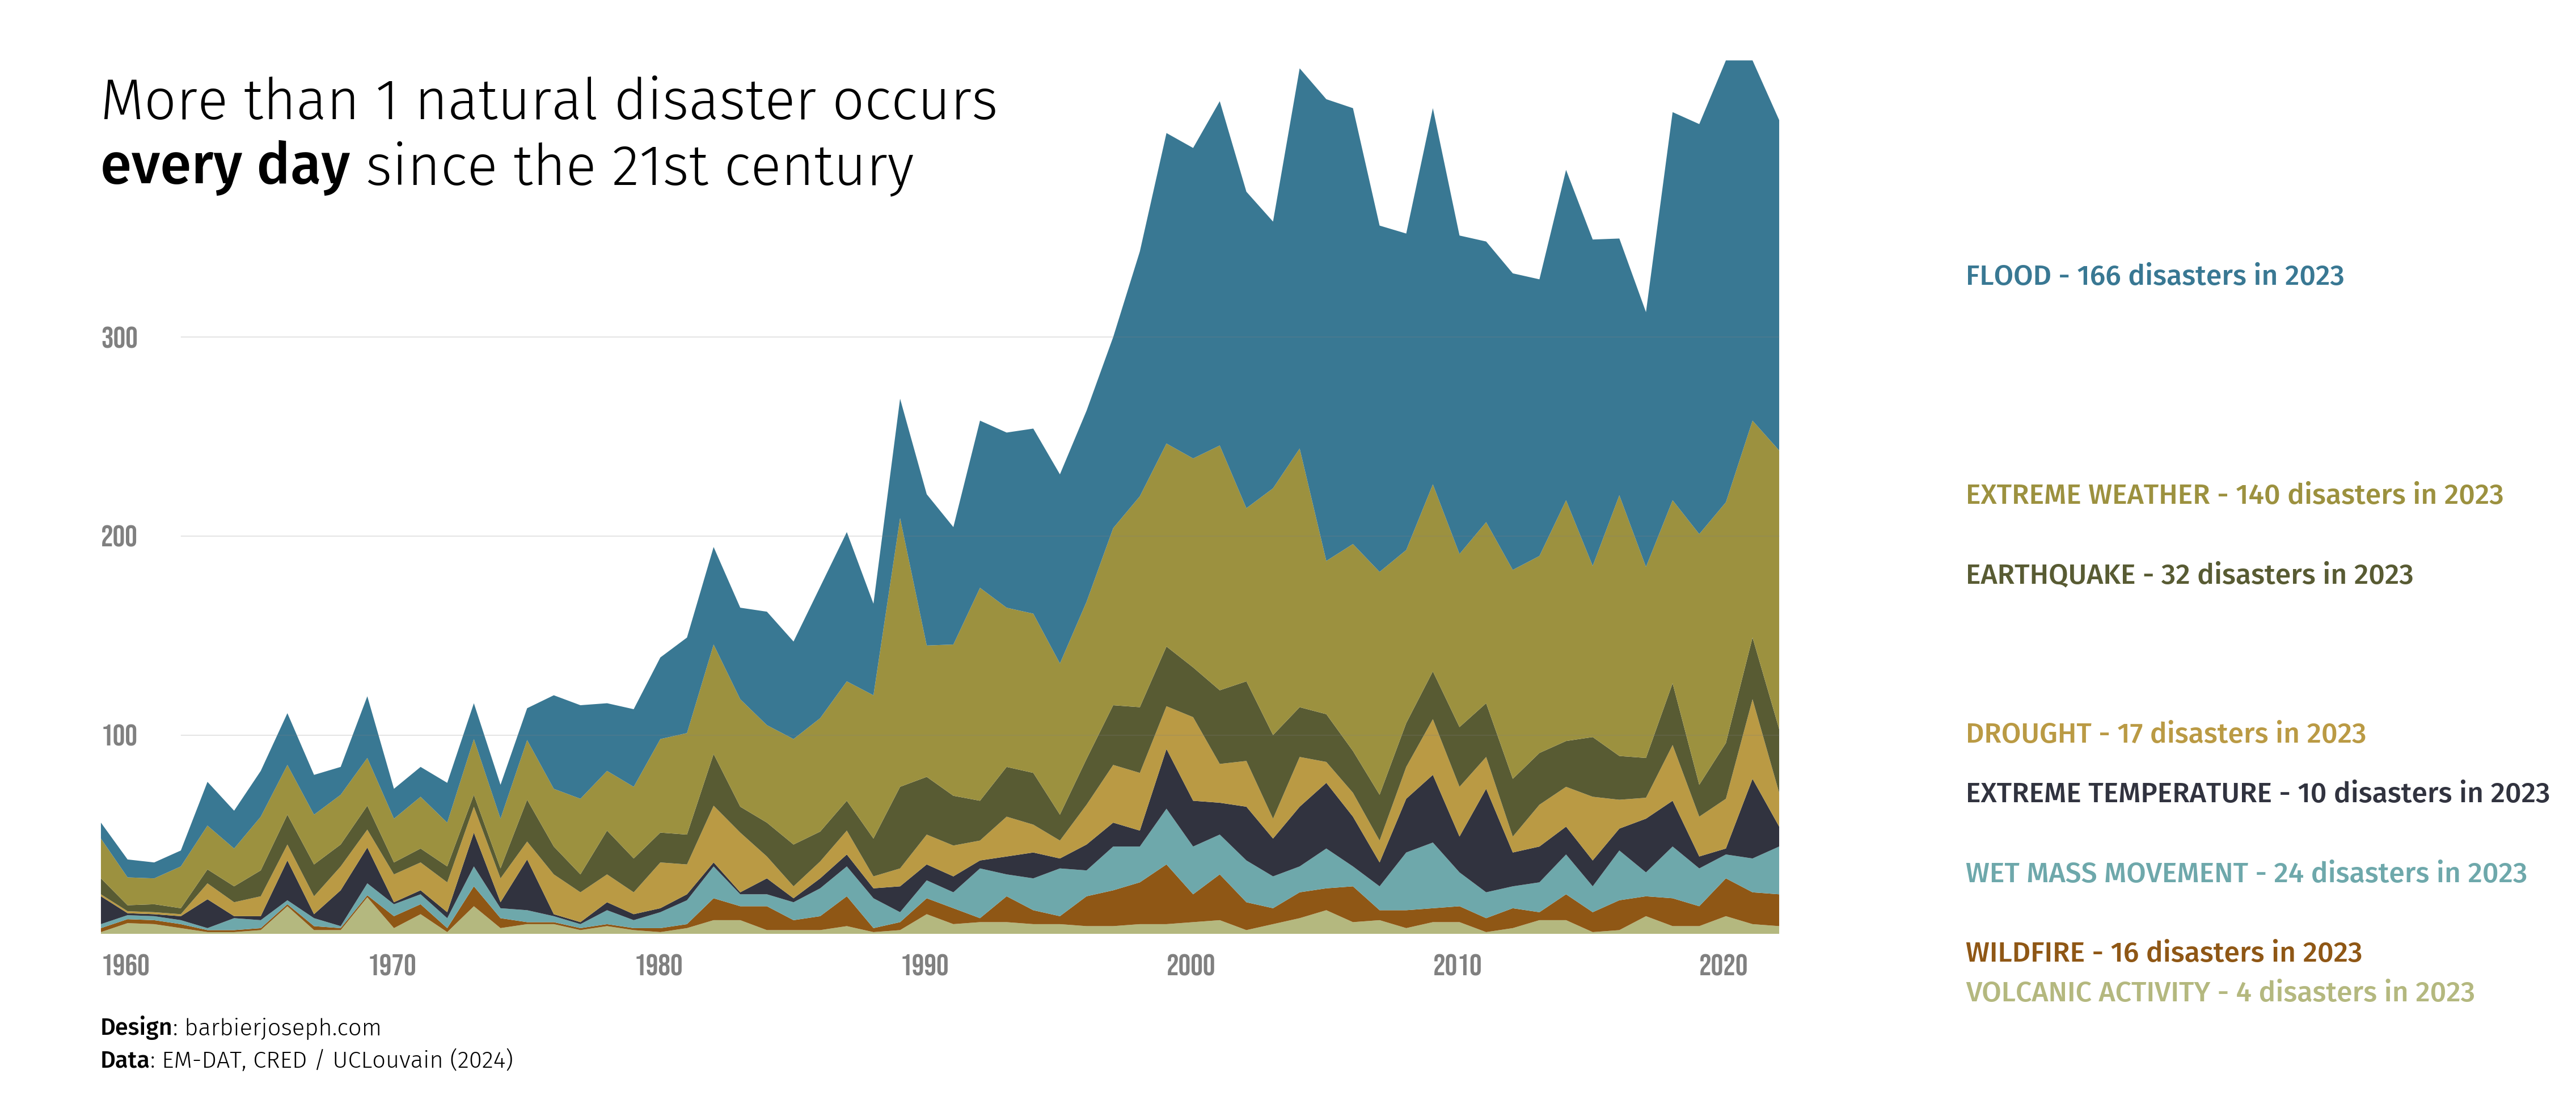

In [11]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.1)

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   country = columns[::-1][i]
   val_2023 = int(df.loc[2023, country])
   ax_text(
      x=2030, y=y_pos[i], s=f"{country.upper()} - {val_2023} disasters in 2023",
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color=colors[7-i]
   )

# display the plot
plt.savefig('stacked-area-9.png', dpi=300, bbox_inches='tight')
plt.show()

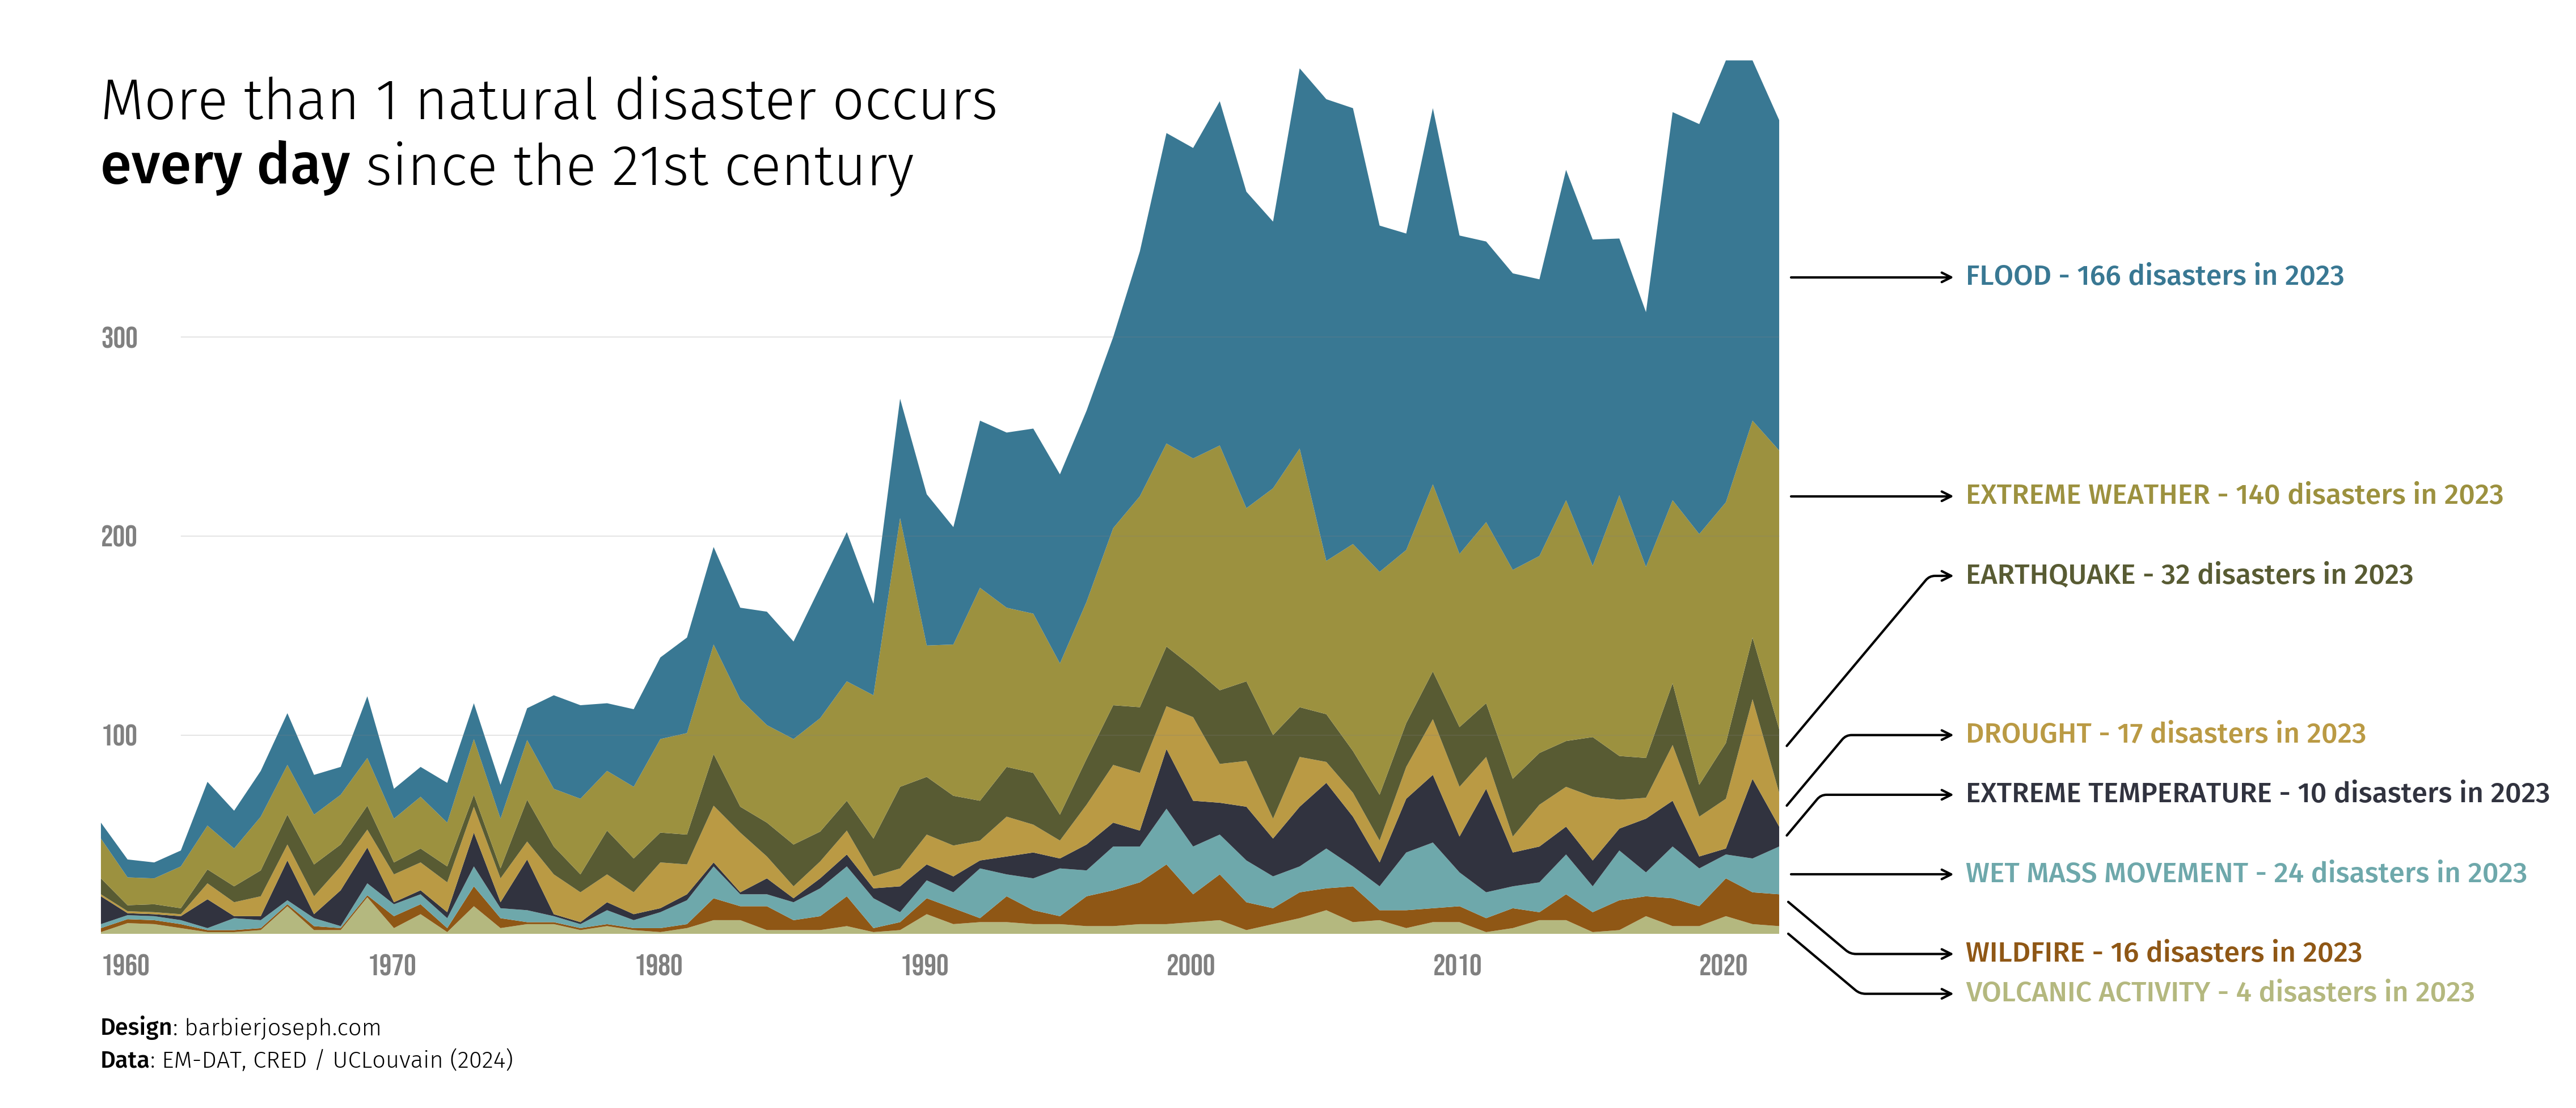

In [12]:
# set up the font properties
personal_path = '/Users/josephbarbier/Library/Fonts/'
font = FontProperties(fname=personal_path + 'BebasNeue-Regular.ttf')
other_font = FontProperties(fname=personal_path + 'FiraSans-Light.ttf')
other_bold_font = FontProperties(fname=personal_path + 'FiraSans-Medium.ttf')

# initialize the figure
fig, ax = plt.subplots(figsize=(14,7), dpi=300)
ax.set_axis_off()

# define the x-axis variable and order the columns
columns = df.sum().sort_values().index.to_list()
x = df.index

# defines color map and mapping with columns
colors = get_hex('Dali')
color_mapping = {
   'Flood': colors[4],
   'Volcanic activity': colors[0],
   'Wildfire': colors[6],
   'Drought': colors[7],
   'Extreme temperature': colors[5],
   'Wet mass movement': colors[3],
   'Earthquake': colors[2],
   'Extreme weather': colors[1],
}
colors = [color_mapping[col] for col in columns]

# create the stacked area plot
areas = np.stack(df[columns].values, axis=-1)
ax.stackplot(x, areas, colors=colors)

# add label for the x-axis
for year in range(1960, 2030, 10):
   ax_text(
      x=year, y=-10, s=f'{year}',
      va='top', ha='left',
      fontsize=13, font=font,
      color='grey'
   )

# add label for the y-axis
for value in range(100, 400, 100):
   ax_text(
      x=1960, y=value, s=f'{value}',
      va='center', ha='left',
      fontsize=13, font=font,
      color='grey'
   )
   ax.plot([1963, 2023], [value, value], color='grey', lw=.1)

# add title
fig_text(
   s='More than 1 natural disaster occurs\n<every day> since the 21st century',
   x=.16, y=.83, fontsize=24, 
   ha='left', va='top', color='black',
   font=other_font, fig=fig,
   highlight_textprops=[{'font': other_bold_font}]
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: EM-DAT, CRED / UCLouvain (2024)
"""
fig_text(
   s=text, x=.16, y=.05,
   fontsize=10, ha='left', va='top',
   color='black', fontproperties=other_font,
   highlight_textprops=[{'font': other_bold_font},{'font': other_bold_font}]
)

# add inline labels
y_pos = [330, 220, 180, 100, 70, 30, -10, -30]
for i in range(len(y_pos)):
   country = columns[::-1][i]
   val_2023 = int(df.loc[2023, country])
   ax_text(
      x=2030, y=y_pos[i], s=f"{country.upper()} - {val_2023} disasters in 2023",
      va='center', ha='left',
      font=other_bold_font, fontsize=12,
      color=colors[7-i]
   )

# add inflexion arrows
x_axis_start = 2023
x_axis_end = 2030
radius = 10
arrow_inflexion(ax, end=(x_axis_end, 330), start=(x_axis_start, 330), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 220), start=(x_axis_start, 220), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 180), start=(x_axis_start, 90), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 100), start=(x_axis_start, 60), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 70), start=(x_axis_start, 45), angleA=50, angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, 30), start=(x_axis_start, 30), angleA=180 ,angleB=90, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, -10), start=(x_axis_start, 20), angleA=140 ,angleB=180, radius=radius)
arrow_inflexion(ax, end=(x_axis_end, -30), start=(x_axis_start, 4), angleA=140 ,angleB=180, radius=radius)

# display the plot
plt.savefig('stacked-area-10.png', dpi=300, bbox_inches='tight')
plt.show()